In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import laplace_transform, limit, exp
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import symbols, Heaviside, cos, sin

## Eingeschwungene Lösung

 Auf das lineare, zeitinvariante System gegeben durch die Übertragungsfunktion $$G(s) = \frac{21s}{(s+7)(s+8)} $$ wird das Eingangssignal $$u(t) = 12\sigma(t) + \frac{cos(t)}{(t+9)^4} + 2sin(7t-\frac{1}{2}) $$ aufgeschaltet. Berechnen Sie den Verlauf des Ausgangs y(t) im eingeschwungenen Zustand, d.h. nachdem alle transienten Vorgänge für t>0 abgeklungen sind.

### Lösung

Für den eingeschwungenen Zustand bleiben nur die Anteile von $u(t)$ relevant, die nicht abklingen, d.h., die Konstante und der sinusförmige Term. Damit können wir für den eingeschwungenen Zustand $u(t)$ näherungsweise als: $$u(t) = 12 + 2sin(7t-\frac{1}{2})$$ betrachten.

$$G(s) = \frac{21s}{(s+7)(s+8)} $$ Die Polstelle sind s = -7 und s = -8, d.h. < 0 ==> G(s) stabil. 

Skriptum 3.7 "G(s) BIBO-stabil ist, dann erhält man für die Ausgangsgröße y(t) im eingeschwungenen Zustand (d. h. nach Abklingen der transienten Vorgänge) wieder eine harmonische Funktion mit identischer Frequenz ω0 aber veränderter Phase und Amplitude" $$y(t) = A_{0}|G(I\omega_{0})|\cdot sin(\omega_{0}t + arg(G(I\omega_{0})))$$

#### Berechnung der Systemantwort


1. **Reaktion auf den konstanten Anteil**'
   
   Die stationäre Antwort auf einen konstanten Eingang wird durch den Gleichanteil (DC-Gain) der Übertragungsfunktion bestimmt.

In [8]:
s,t = symbols('s t')
G_s = 21 * s / ((s + 7) * (s + 8))
dc_gain = limit(G_s, s, 0)
dc_gain

0

Das System reagiert also nicht auf konstante Eingänge, und es gibt keinen Beitrag zum Ausgang $y(t)$ durch den konstanten Term.

2. **Reaktion auf den sinusförmigen Anteil**
   
   $u(t) = 2sin(7t-\frac{1}{2})$, allgemein $u(t) = Asin(\omega\cdot t + \phi)$

In [12]:
s, t, omega = sp.symbols('s t omega', real=True)
G_s = 21 * s / ((s + 7) * (s + 8))
omega_val = 7

G_jw = G_s.subs(s, sp.I * omega)

G_jw

21*I*omega/((I*omega + 7)*(I*omega + 8))

In [14]:
G_jw_at_omega = sp.simplify(G_jw.subs(omega, omega_val))

G_jw_at_omega

315/226 + 21*I/226

In [16]:
amplitude = sp.Abs(G_jw_at_omega)
phase = sp.arg(G_jw_at_omega)

print(f"amplitude |G(jω)| mit ω = {omega_val}: {amplitude}")
print(f"phase |G(jω)| mit ω = {omega_val}: {phase}")

amplitude |G(jω)| mit ω = 7: 21*sqrt(226)/226
phase |G(jω)| mit ω = 7: atan(1/15)


In [18]:
A = 2 
phi = -1/2

y_t = amplitude * A * sp.sin(omega_val * t + phi + phase)

y_t

21*sqrt(226)*sin(7*t - 0.5 + atan(1/15))/113

In [20]:
print(y_t)

21*sqrt(226)*sin(7*t - 0.5 + atan(1/15))/113


## Übertragungsfunktion berechnen

Gegeben ist das lineare, zeitinvariante System

$\dot{x} = Ax + bu$

$y = c^T x + du$

mit

$
A = \begin{pmatrix}
5 & -4 & -9 & -1 \\
-8 & -5 & 0 & -2 \\
3 & 2 & -8 & 4 \\
1 & -9 & -4 & -6
\end{pmatrix}, $
$b = \begin{pmatrix}
-5 \\
-9 \\
3 \\
-9
\end{pmatrix}, $
$c = \begin{pmatrix}
-7 \\
7 \\
-7 \\
1
\end{pmatrix}, $
$d = -5.$

Berechnen Sie die zugehörige Übertragungsfunktion $G(s)$. Vereinfachen Sie diese so weit wie möglich.


Die Übertragungsfunktion $G(s) = c^T(sE-A)^{-1}b+d$

In [25]:
c = sp.Matrix([-7,7,-7,1])
c_T = c.T
c_T

Matrix([[-7, 7, -7, 1]])

In [27]:
A = sp.Matrix([[5,-4,-9,-1],[-8,-5,0,-2],[3,2,-8,4],[1,-9,-4,-6]])
A

Matrix([
[ 5, -4, -9, -1],
[-8, -5,  0, -2],
[ 3,  2, -8,  4],
[ 1, -9, -4, -6]])

In [29]:
b = sp.Matrix([-5,-9,3,-9])
b

Matrix([
[-5],
[-9],
[ 3],
[-9]])

In [31]:
d = -5

In [33]:
s = sp.symbols('s', real=True)
G_s = sp.simplify(c_T * (s * sp.eye(4) - A).inv() * b + sp.Matrix([[d]]))
G_s

Matrix([[(-5*s**4 - 128*s**3 + 642*s**2 + 5784*s + 15774)/(s*(s**3 + 14*s**2 + 17*s - 614))]])

In [35]:
print(G_s)

Matrix([[(-5*s**4 - 128*s**3 + 642*s**2 + 5784*s + 15774)/(s*(s**3 + 14*s**2 + 17*s - 614))]])


## Übertragungsfunktion eines dynamischen System

Gegeben ist das Bode-Diagramm (Amplituden- und Phasengang) eines linearen zeitinvarianten SISO-Systems. Gesucht ist die zum Bode-Diagramm zugehörige Übertragungsfunktion  G(s). Sie können dabei annehmen, dass der Verstärkungsfaktor V ein ganzzahliges Vielfaches einer Zehnerpotenz ist.

Für die Knickfrequenzen  ωi der Null-  zi und Polstellen  pi gilt:  ωi=a⋅10b; a∈N, b∈Z.

Sie können weiters annehmen, dass die Übertragungsfunktion nur rein reelle Nullstellen besitzt. Die vorkommenden Dämpfungsgrade  ξi der konjungiert komplexen Polstellen werden zwischen 0 und 1 gewählt.

Hinweis: Zur zusätzlichen Kontrolle der Lösung können Sie sich das Bodediagramm in einem CAS-Programm (z.B.: Maple, Matlab) Ihrer Wahl plotten lassen.

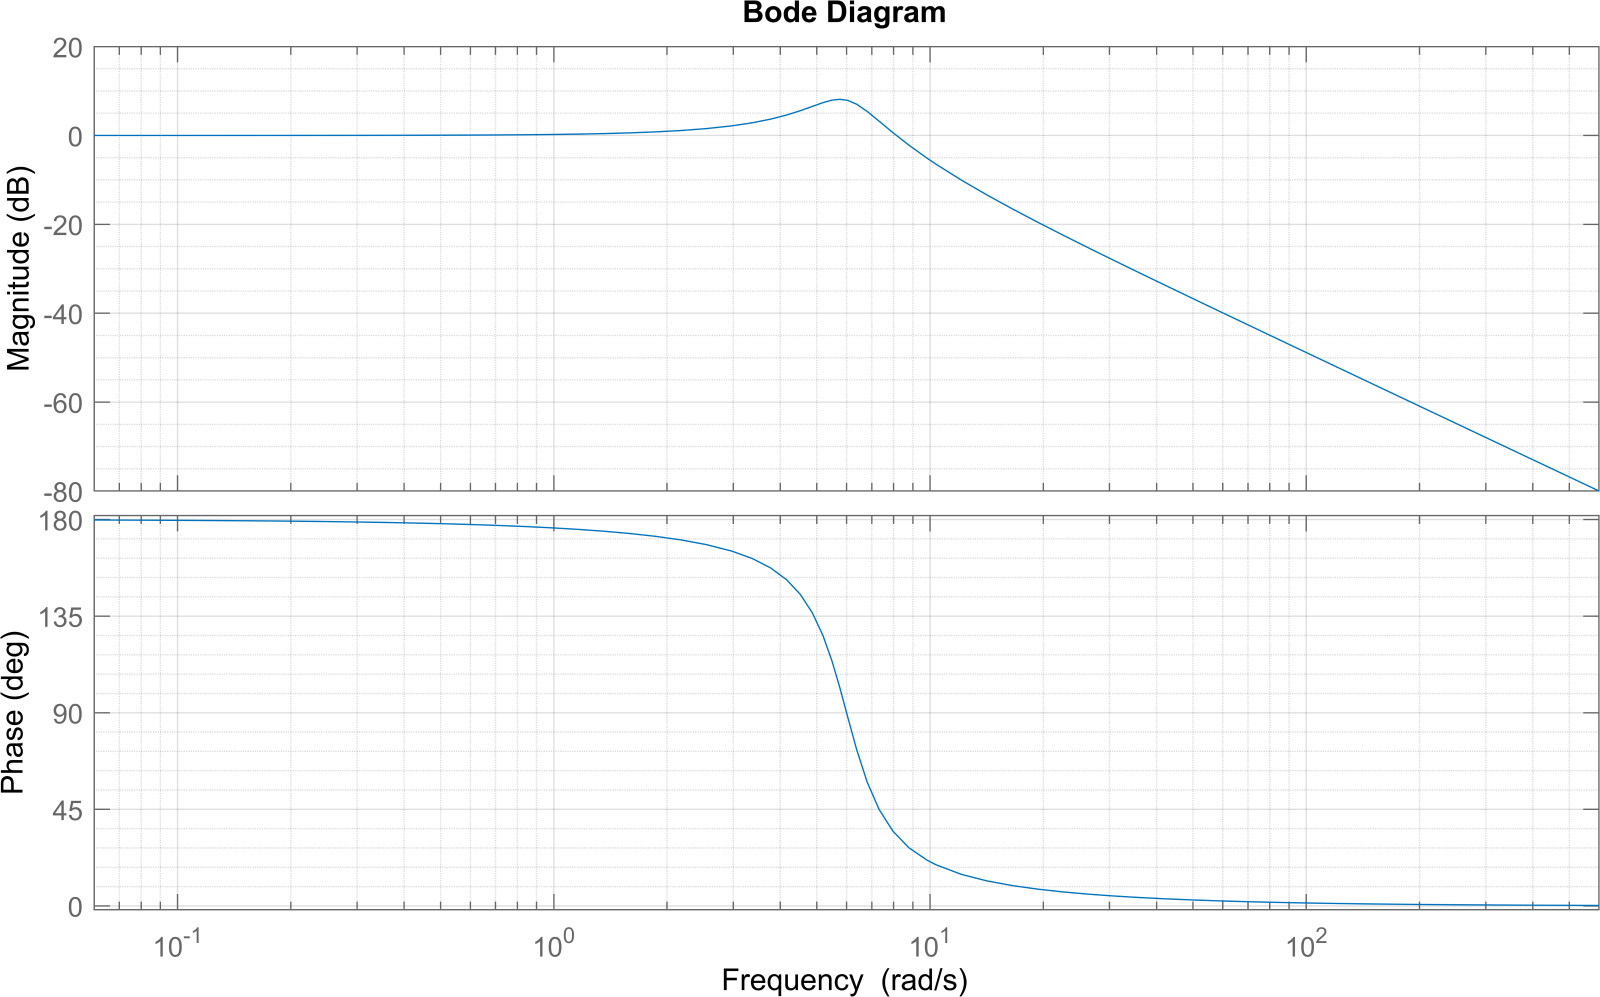

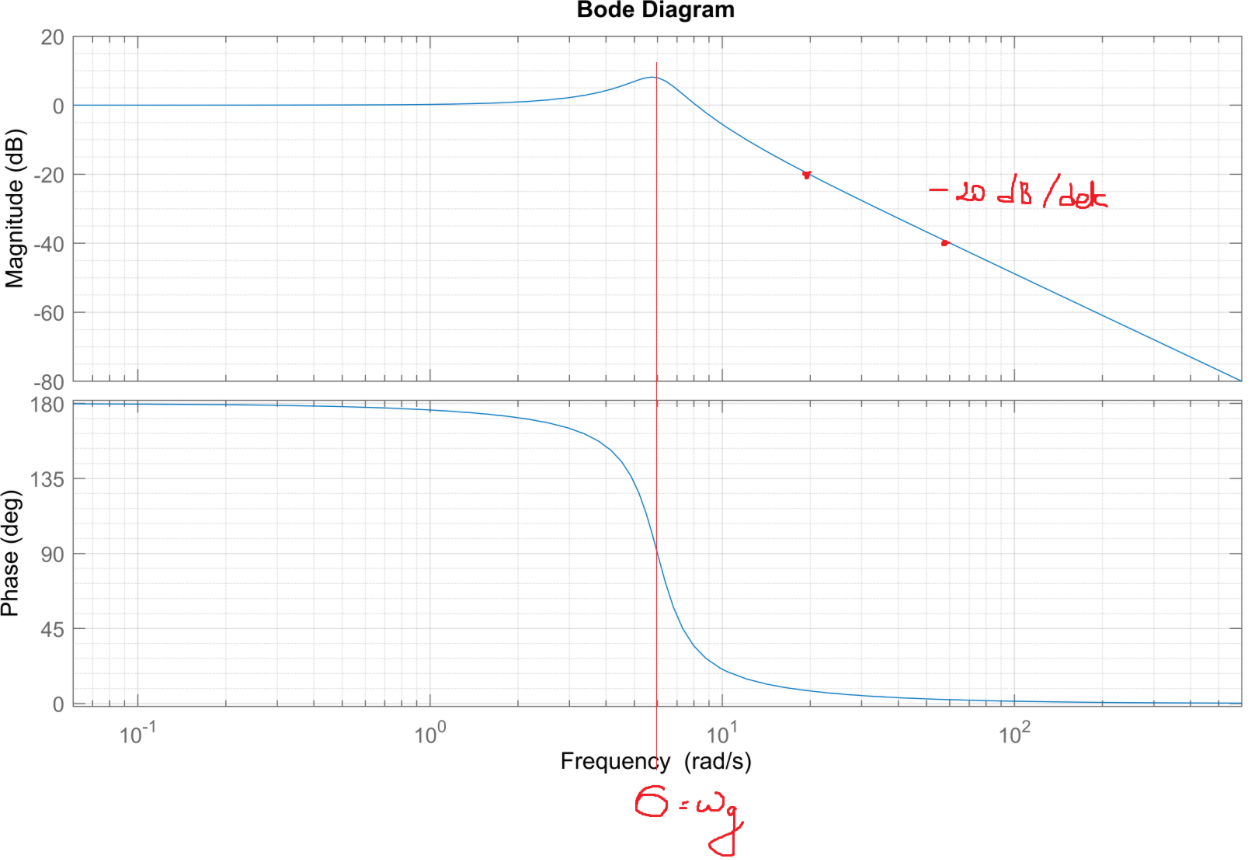

G(s) sieht ungefähr so aus:

$G(s) =\frac{-1}{1 + 2*\xi*(\frac{I*\omega}{\omega_{g}}) + (\frac{I*\omega}{\omega_{g}})^2} $ 

$\omega_{g} = 6$ dann:

$|\frac{-1}{1 + 2*\xi*(\frac{I*\omega}{6}) + (\frac{I*\omega}{6})^2}|_{dB} \cong 8$ 

$|\frac{-1}{1 + 2*\xi*(\frac{I*6}{6}) + (\frac{I*6}{6})^2}|_{dB} = 8$ 

$20 \log_{10} \left| \frac{-1}{1 + 2 \xi z + z^2} \right| = 8$

$log_{10} \left| \frac{-1}{1 + 2 \xi z + z^2} \right| = \frac{8}{20} = 0.4$

$\left| \frac{-1}{1 + 2 \xi z + z^2} \right| = 10^{0.4}$

$\left| \frac{-1}{1 + 2 \xi z + z^2} \right| = 2.51188643150958$

In [47]:
xi = sp.Symbol('xi', real=True)

z = (sp.I*6/6)

expr = -1 / (1 + 2 * xi * z + z**2)

magnitude_eq = sp.Eq(sp.Abs(expr), 2.51188643150958)

solution = sp.solve(magnitude_eq, xi)

solution

[-0.199053585276749, 0.199053585276749]

$G(s) =\frac{1}{1 + 2*1/5*(\frac{s}{\omega_{g}}) + (\frac{s}{\omega_{g}})^2} $ 

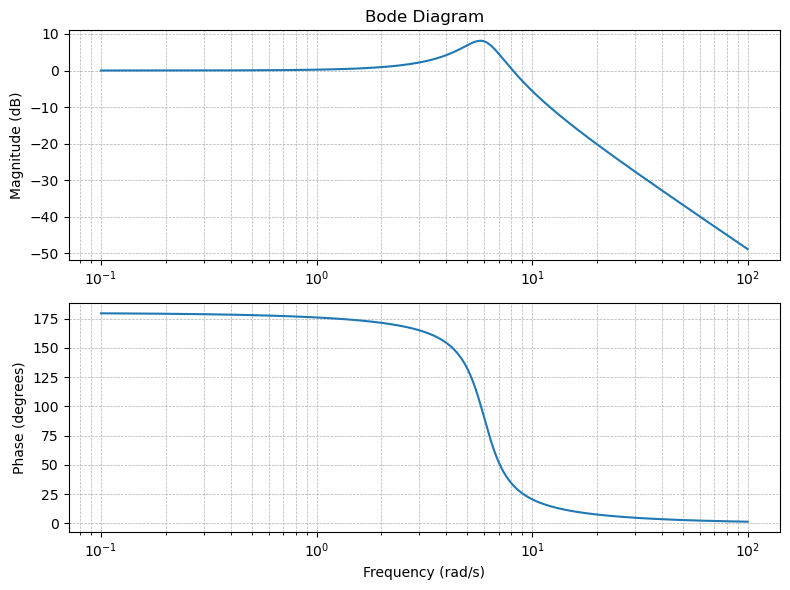

In [50]:
omega_g = 6  
G_s = lambda omega: -1/ (1 + 2 * (0.2) * (1j * omega / omega_g) + (1j * omega / omega_g)**2) # -1 for phase 180 --> 0

omega = np.logspace(-1, 2, 500)  # Frequency range (rad/s)
G = np.vectorize(G_s)(omega)  # Compute transfer function

# Compute magnitude and phase
magnitude = 20 * np.log10(np.abs(G))
phase = np.angle(G, deg=True)

# Plot Bode Diagram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Magnitude plot
ax1.semilogx(omega, magnitude)
ax1.set_title('Bode Diagram')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(which='both', linestyle='--', linewidth=0.5)

# Phase plot
ax2.semilogx(omega, phase)
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (degrees)')
ax2.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [52]:
xi = sp.Symbol('xi', real=True)
i = sp.I  

z = (i * 6) / 6  
expr = (1-i * 1/(3*10**-2)) / (1 + 2 * xi * i*1 + (i*1)**2)

magnitude_eq = sp.Eq(sp.Abs(expr), 30.46)

solution = sp.solve(magnitude_eq, xi)

solution

[-0.547411850949626, 0.547411850949626]

#### Matlab Skript

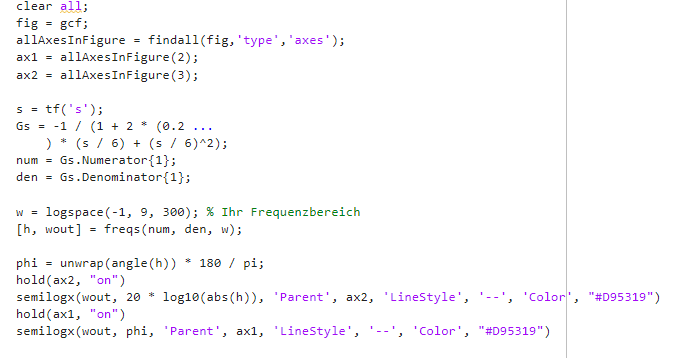
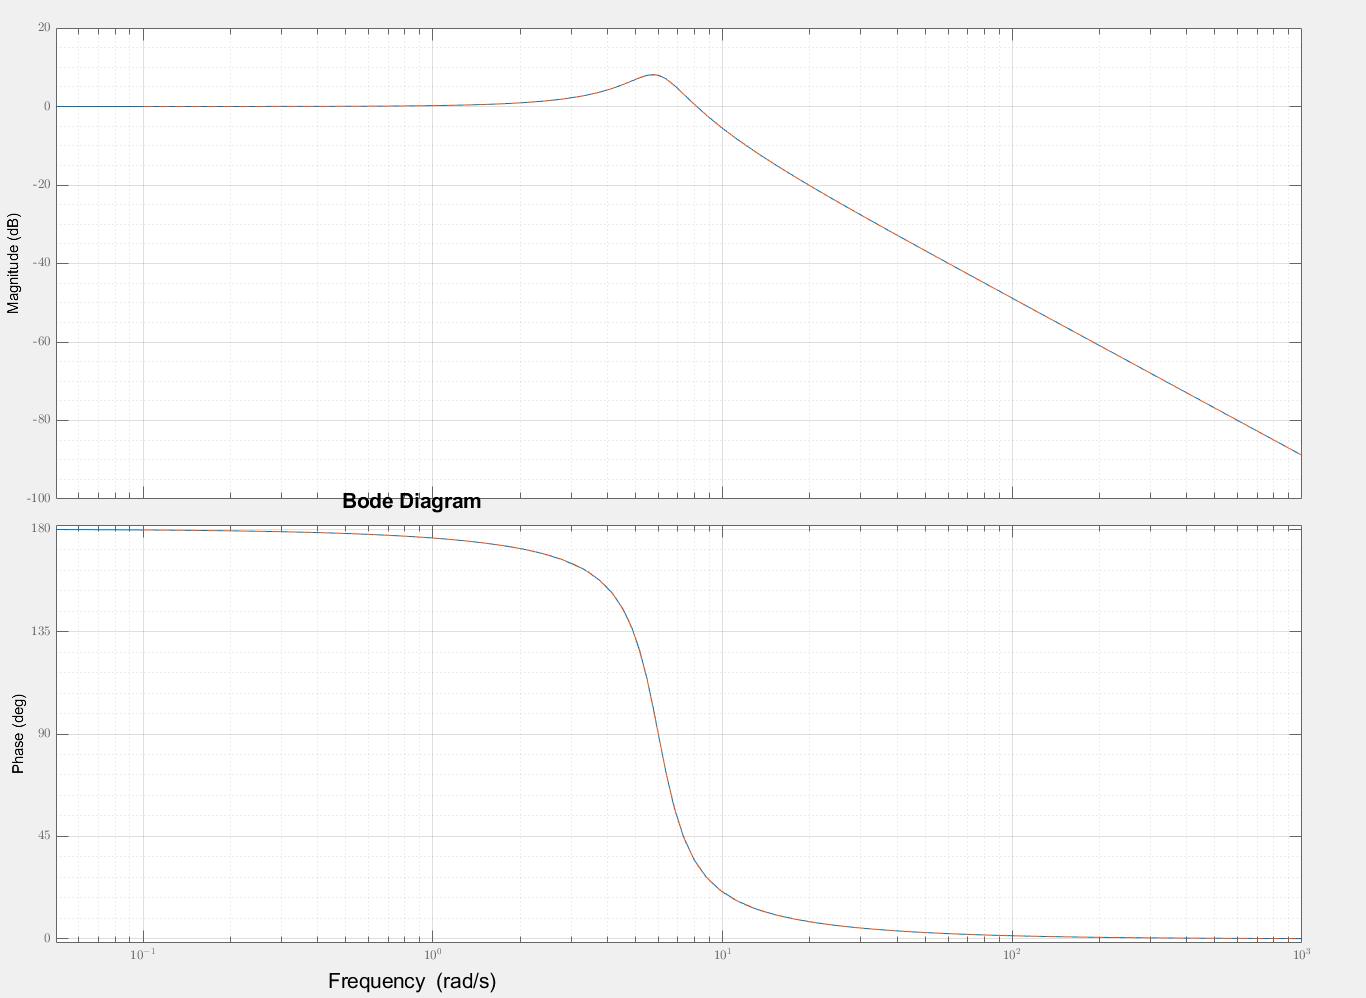

## Eigenschaften von Übertragungsfunktionen

Gegeben ist die Übertragungsfunktion

$G(s)= 9\cdot \frac{s^3+19s^2−106s−2464}{s^3−7s^2−26s+72}$
   
Welche der folgenden Aussagen gilt für das durch  G(s) beschriebene System?

#### 1. Das Nennerpolynom ist ein Hurwitzpolynom.

Ein Hurwitzpolynom (nach Adolf Hurwitz) ist ein reelles Polynom, dessen Nullstellen alle einen echt negativen Realteil haben.

In [57]:
s = sp.Symbol('s')

expr = s**3-7*s**2-26*s+72

eq = sp.Eq(expr, 0)

solution = sp.solve(eq, s, domain=sp.Complexes)

solution

[-4, 2, 9]

Kein Hurwitzpolynom --> FALSE

#### 2. Das System ist nicht realisierbar.
Eine Übertragungsfunktion G(s) = z(s)/n(s) mit dem Zähler- und Nennerpolynom z(s) und n(s) ist genau dann realisierbar, wenn
**grad(z(s)) ≤ grad(n(s))**. Oder äquivalent dazu
lims→∞|G(s)| < ∞

In [61]:
expr = 9*(s**3+19*s**2-106*s-2464)/(s**3-7*s**2-26*s+72)

lim = sp.limit(expr, s, sp.oo)

lim

9

Das System ist nicht realisierbar --> FALSE

#### 3. Das System ist realisierbar und sprungfähig.

Das System ist realisierbar (sehe oben).
G(s) ist sprungfähig, wenn gilt lim(s→∞)G(s) ̸= 0 bzw. in Worten ausgedrückt, der Zähler- und Nennergrad von G(s) sind gleich.

Das System ist realisierbar und sprungfähig --> TRUE

#### 4. Ein beschränkter Eingang kann einen unbeschränkten Ausgang hervorrufen.

Ein beschränkter Eingang kann in der Regelungstechnik zu einem unbeschränkten Ausgang führen, wenn das System instabil oder nichtlinear ist.
Ein System ist stabil, wenn alle Polstellen in der linken Halbebene der komplexen Ebene liegen (d. h. der Realteil jeder Polstelle ist negativ).

Das System ist instabil --> Ein beschränkter Eingang kann einen unbeschränkten Ausgang hervorrufen --> TRUE

#### 5. Das System ist nicht BIBO-stabil.

TRUE

#### 6. Das System ist realisierbar und nicht sprungfähig.

FALSE

#### 7. Das System ist im Zustandsraum darstellbar.

TRUE

#### 8. Das System ist BIBO-stabil.

FALSE

#### 9. Die Impulsantwort g(t) ist absolut integrabel.

Um zu zeigen, dass die Impulsantwort g(t) des gegebenen Systems absolut integrierbar ist, müssen wir sicherstellen, dass das System stabil ist und dass die Übertragungsfunktion G(s) keine instabilen Pole in der rechten Halbebene der komplexen Ebene hat. Das bedeutet, dass die Polstellen des Systems alle in der linken Halbebene oder auf der imaginären Achse liegen müssen.

FALSE

#### 10. Das Nennerpolynom ist kein Hurwitzpolynom.

TRUE